In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

df = pd.read_csv('activity_data.csv')
df = df.dropna(subset=['r_avg_IC50'])
df.sort_values(by=['r_avg_IC50'],ascending=True,inplace=True)
df = df.drop(df[df['r_avg_IC50']>=99].index)
print(df)
#df.to_csv('data.txt',sep ='\t', index = False, header = False)

                                                SMILES                  CID  \
479            N#Cc1cccc(CN2C(=O)C(=O)c3cccc(Br)c32)c1  LOR-NOR-30067bb9-11   
251  CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...   JOH-MSK-46727e7b-1   
624                 O=C(Oc1cncc(Cl)c1)c1cccc2[nH]ccc12   ALP-POS-c59291d4-5   
147            O=C(Nc1cncc2ccccc12)C1=CCCc2ccc(Cl)cc21   MAT-POS-0c8fa4a7-1   
253  O=S(=O)(Cc1ccccc1F)c1oc(-c2ccc(F)cc2)nc1S(=O)(...   LON-WEI-4d77710c-2   
..                                                 ...                  ...   
92             Nc1nn(C(=O)C2CCOc3ccc(Cl)cc32)c2ccncc12   ALP-POS-902f21bb-2   
818   COc1ccc(N2CCN(C(=O)c3cc(=O)[nH]c4ccccc34)CC2)cc1  BEN-DND-7e92b6ca-11   
420      CC(C)Cn1cc(NC(=O)NCCc2ccc(Cl)cc2)c2ccccc2c1=O   MAT-POS-2492181e-4   
194  Cc1cc(C(F)(F)F)nc2n[nH]c(NC(=O)C3CCOc4ccc(Cl)c...  JAG-UCB-52b62a6f-19   
422      CC(C)Cn1cc(NC(=O)NCCCN2CCC(C)CC2)c2ccccc2c1=O   MAT-POS-2492181e-6   

           canonical_CID  r_inhibition_at_20_uM  r_

In [2]:
dock = pd.read_csv('scores.csv')
dock = dock.dropna(axis=0, how='all')
#print(dock)
dock.rename(columns={'lig_name': 'CID'},inplace = True)
dock['CID'] = dock['CID'].apply(lambda x: x.split('\t')[0])
#print(dock)

df = df[['CID','SMILES','r_avg_IC50']]
result=pd.merge(df,dock,on='CID')
print(result)

                     CID                                             SMILES  \
0    LOR-NOR-30067bb9-11            N#Cc1cccc(CN2C(=O)C(=O)c3cccc(Br)c32)c1   
1     JOH-MSK-46727e7b-1  CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...   
2     ALP-POS-c59291d4-5                 O=C(Oc1cncc(Cl)c1)c1cccc2[nH]ccc12   
3     MAT-POS-0c8fa4a7-1            O=C(Nc1cncc2ccccc12)C1=CCCc2ccc(Cl)cc21   
4     LON-WEI-4d77710c-2  O=S(=O)(Cc1ccccc1F)c1oc(-c2ccc(F)cc2)nc1S(=O)(...   
..                   ...                                                ...   
348   ALP-POS-902f21bb-2            Nc1nn(C(=O)C2CCOc3ccc(Cl)cc32)c2ccncc12   
349  BEN-DND-7e92b6ca-11   COc1ccc(N2CCN(C(=O)c3cc(=O)[nH]c4ccccc34)CC2)cc1   
350   MAT-POS-2492181e-4      CC(C)Cn1cc(NC(=O)NCCc2ccc(Cl)cc2)c2ccccc2c1=O   
351  JAG-UCB-52b62a6f-19  Cc1cc(C(F)(F)F)nc2n[nH]c(NC(=O)C3CCOc4ccc(Cl)c...   
352   MAT-POS-2492181e-6      CC(C)Cn1cc(NC(=O)NCCCN2CCC(C)CC2)c2ccccc2c1=O   

     r_avg_IC50  LF Rank Score  LF dG  LF VSscore  

In [3]:
#test1: exp_rank vs VSscore_rank
test1 = result
test1.sort_values(by=['r_avg_IC50'],ascending=True,inplace=True)
test1 = test1.reset_index(drop=True)
test1 = test1.reset_index(drop=False)
test1.rename(columns={'index':'exp_rank'}, inplace = True)
print(test1)

test1.sort_values(by=['LF Rank Score'],ascending=True,inplace=True)
test1 = test1.reset_index(drop=True)
test1 = test1.reset_index(drop=False)
test1.rename(columns={'index':'Rankscore_rank'}, inplace = True)

print(test1)
print(result)

     exp_rank                  CID  \
0           0  LOR-NOR-30067bb9-11   
1           1   JOH-MSK-46727e7b-1   
2           2   ALP-POS-c59291d4-5   
3           3   MAT-POS-0c8fa4a7-1   
4           4   LON-WEI-4d77710c-2   
..        ...                  ...   
348       348   ALP-POS-902f21bb-2   
349       349  BEN-DND-7e92b6ca-11   
350       350   MAT-POS-2492181e-4   
351       351  JAG-UCB-52b62a6f-19   
352       352   MAT-POS-2492181e-6   

                                                SMILES  r_avg_IC50  \
0              N#Cc1cccc(CN2C(=O)C(=O)c3cccc(Br)c32)c1    0.017013   
1    CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...    0.025860   
2                   O=C(Oc1cncc(Cl)c1)c1cccc2[nH]ccc12    0.055726   
3              O=C(Nc1cncc2ccccc12)C1=CCCc2ccc(Cl)cc21    0.081067   
4    O=S(=O)(Cc1ccccc1F)c1oc(-c2ccc(F)cc2)nc1S(=O)(...    0.099212   
..                                                 ...         ...   
348            Nc1nn(C(=O)C2CCOc3ccc(Cl)cc32)c2ccncc1

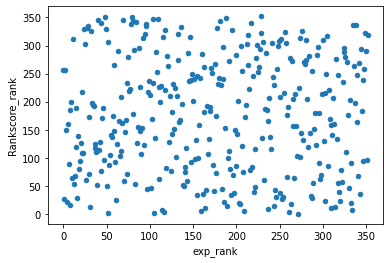

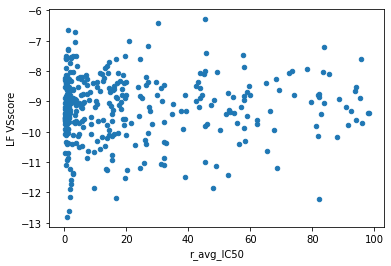

均方误差(MSE)：1668.9606551050601
0.020851702553940036
0.03095158787604664


In [4]:
test1.plot(kind='scatter', x='exp_rank', y='Rankscore_rank')
plt.show()

test1.plot(kind='scatter', x='r_avg_IC50', y='LF VSscore')
plt.show()

corr = test1.exp_rank.corr(test1.Rankscore_rank)
corr2 = test1.r_avg_IC50.corr(test1['LF VSscore'])
print(f"均方误差(MSE)：{mean_squared_error(test1.r_avg_IC50, test1['LF VSscore'])}")
print(corr)
print(corr2)

In [5]:
# kt = 9.83*10^(-22) cal at 20 degree = 300*0.001985875
dG_exp = 300*0.001985875*np.log(test1.r_avg_IC50/result['r_avg_IC50'].max())
print(dG_exp)

dG_flare = test1['LF dG']-(result['LF dG'].max())
print(dG_flare)

#test2: dG_exp vs dG_flare
test2 = pd.concat([dG_exp, dG_flare], axis=1)
test2.rename(columns={'r_avg_IC50':'dG_exp', 'LF dG': 'dG_flare'},inplace=True)
print(test2)

0     -0.552627
1     -2.981016
2     -2.287395
3     -0.667709
4     -2.112856
         ...   
348   -2.297454
349   -1.178797
350   -2.995608
351   -2.604584
352   -0.964171
Name: r_avg_IC50, Length: 353, dtype: float64
0     -5.082
1     -2.599
2     -5.234
3     -5.095
4     -5.197
       ...  
348   -3.306
349   -2.483
350   -3.092
351   -0.802
352   -2.232
Name: LF dG, Length: 353, dtype: float64
       dG_exp  dG_flare
0   -0.552627    -5.082
1   -2.981016    -2.599
2   -2.287395    -5.234
3   -0.667709    -5.095
4   -2.112856    -5.197
..        ...       ...
348 -2.297454    -3.306
349 -1.178797    -2.483
350 -2.995608    -3.092
351 -2.604584    -0.802
352 -0.964171    -2.232

[353 rows x 2 columns]


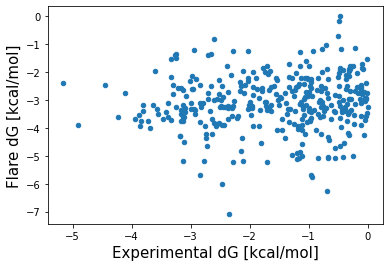

0.08776788005965994
均方误差(MSE)：4.375476292917984
根均方误差(RMSE)：2.0917639190209742


<lifelines.CoxPHFitter: fitted with 353 total observations, 1 right-censored observations>
             duration col = 'dG_flare'
                event col = 'dG_exp'
      baseline estimation = breslow
   number of observations = 353
number of events observed = 352
   partial log-likelihood = -1716.39
         time fit was run = 2021-04-08 08:35:07 UTC

---
Empty DataFrame
Columns: [ coef,  exp(coef),  se(coef),  coef lower 95%,  coef upper 95%,  exp(coef) lower 95%,  exp(coef) upper 95%]
Index: []

Empty DataFrame
Columns: [ z,  p,  -log2(p)]
Index: []
---
Concordance = 0.50
Partial AIC = 3432.78
log-likelihood ratio test = 0.00 on 0 df
-log2(p) of ll-ratio test = nan

In [6]:
ax = test2.plot(kind='scatter', x='dG_exp', y='dG_flare')
ax.set_xlabel('Experimental dG [kcal/mol]',fontsize=15)
ax.set_ylabel("Flare dG [kcal/mol]",fontsize=15)
plt.show()

corr1 = test2.dG_exp.corr(test2.dG_flare)
print(corr1)

from sklearn.metrics import mean_squared_error, r2_score
print(f"均方误差(MSE)：{mean_squared_error(dG_exp, dG_flare)}")
print(f"根均方误差(RMSE)：{np.sqrt(mean_squared_error(dG_exp, dG_flare))}")
from lifelines import CoxPHFitter
from lifelines.datasets import load_rossi
cph = CoxPHFitter()
cph.fit(test2, 'dG_flare', 'dG_exp')
cph.print_summary() 

# GNN

In [7]:
#set train,test data set.
prot_seq ='SGFRKMAFPSGKVEGCMVQVTCGTTTLNGLWLDDVVYCPRHVICTSMLNPNYEDLLIRKSNHNFLVQAGNVQLRVIGHSMQNCVLKLKVDTANPKTPKYKFVRIQPGQTFSVLACYNGSPSGVYQCAMRPNFTIKGSFLNGSCGSVGFNIDYDCVSFCYMHHMELPTGVHAGTDLEGNFYGPFVDRQTAQAAGTDTTITVNVLAWLYAAVINGDRWFLNRFTTTLNDFNLVAMKYNYEPLTQDHVDILGPLSAQTGIAVLDMCASLKELLQNGMNGRTILGSALLEDEFTPFDVVRQCSGVTF'
df1 = result
df1['target_sequence']= prot_seq
df1=df1.rename(columns={'r_avg_IC50':'affinity'})
df1['affinity'] = -np.log10(df1['affinity']/(1e6))
print(df1)
#df1.to_csv('candidates.csv')

from sklearn.model_selection import train_test_split
train, test = train_test_split(df1,test_size=0.2)
#print(test)
# train.to_csv('covid_train.csv')
# test.to_csv('covid_test.csv')

                     CID                                             SMILES  \
0    LOR-NOR-30067bb9-11            N#Cc1cccc(CN2C(=O)C(=O)c3cccc(Br)c32)c1   
1     JOH-MSK-46727e7b-1  CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...   
2     ALP-POS-c59291d4-5                 O=C(Oc1cncc(Cl)c1)c1cccc2[nH]ccc12   
3     MAT-POS-0c8fa4a7-1            O=C(Nc1cncc2ccccc12)C1=CCCc2ccc(Cl)cc21   
4     LON-WEI-4d77710c-2  O=S(=O)(Cc1ccccc1F)c1oc(-c2ccc(F)cc2)nc1S(=O)(...   
..                   ...                                                ...   
348   ALP-POS-902f21bb-2            Nc1nn(C(=O)C2CCOc3ccc(Cl)cc32)c2ccncc12   
349  BEN-DND-7e92b6ca-11   COc1ccc(N2CCN(C(=O)c3cc(=O)[nH]c4ccccc34)CC2)cc1   
350   MAT-POS-2492181e-4      CC(C)Cn1cc(NC(=O)NCCc2ccc(Cl)cc2)c2ccccc2c1=O   
351  JAG-UCB-52b62a6f-19  Cc1cc(C(F)(F)F)nc2n[nH]c(NC(=O)C3CCOc4ccc(Cl)c...   
352   MAT-POS-2492181e-6      CC(C)Cn1cc(NC(=O)NCCCN2CCC(C)CC2)c2ccccc2c1=O   

     affinity  LF Rank Score  LF dG  LF VSscore  \


In [8]:
df2 = pd.read_csv('Newactivity_data.csv')
df2['target_sequence']= prot_seq
df2.rename(columns={'f_avg_pIC50':'affinity'},inplace = True)
df2 = df2.dropna(subset=['affinity'])

train1, test1 = train_test_split(df2,test_size=0.2)
#print(test1)
#train1.to_csv('covid1_train.csv')
#test1.to_csv('covid1_test.csv')

In [9]:
copy = df1['SMILES']
print(copy)
#copy.to_csv('candidates.txt',index=None)

0                N#Cc1cccc(CN2C(=O)C(=O)c3cccc(Br)c32)c1
1      CC(C)C[C@H](NC(=O)OCc1ccccc1)C(=O)N[C@@H](CC1C...
2                     O=C(Oc1cncc(Cl)c1)c1cccc2[nH]ccc12
3                O=C(Nc1cncc2ccccc12)C1=CCCc2ccc(Cl)cc21
4      O=S(=O)(Cc1ccccc1F)c1oc(-c2ccc(F)cc2)nc1S(=O)(...
                             ...                        
348              Nc1nn(C(=O)C2CCOc3ccc(Cl)cc32)c2ccncc12
349     COc1ccc(N2CCN(C(=O)c3cc(=O)[nH]c4ccccc34)CC2)cc1
350        CC(C)Cn1cc(NC(=O)NCCc2ccc(Cl)cc2)c2ccccc2c1=O
351    Cc1cc(C(F)(F)F)nc2n[nH]c(NC(=O)C3CCOc4ccc(Cl)c...
352        CC(C)Cn1cc(NC(=O)NCCCN2CCC(C)CC2)c2ccccc2c1=O
Name: SMILES, Length: 353, dtype: object


In [10]:
#OEdocking
oedock = pd.read_csv('fred_score.txt',sep ='\t')
oedock['Title'] = oedock['Title'].apply(lambda x: x.split(':')[1])
oedock['Title'] = oedock['Title'].apply(lambda x: x.split('_')[0])
oedock.rename(columns={'Title':'index'}, inplace = True)
oedock['index']=oedock['index'].astype(int)
compare1 = result
compare1.index = compare1.index +1
compare1 = compare1.reset_index(drop=False)

oedock1=pd.merge(oedock, compare1,on = 'index')
oedock1 = oedock1[['CID','r_avg_IC50','FRED Chemgauss4 score']]

print(oedock1)

                     CID  r_avg_IC50  FRED Chemgauss4 score
0     MAT-POS-9ff17035-3    1.475586             -11.817362
1    DAR-DIA-23aa0b97-20   45.077469             -11.161650
2     MAT-POS-173a45da-1    1.021087             -11.144117
3     PET-UNK-3c72d439-1   11.380689             -11.062619
4    LON-WEI-b8d98729-38   32.030614             -11.032317
..                   ...         ...                    ...
345   MAT-POS-f2460aef-2   14.467440              -5.719956
346   TAT-ENA-80bfd3e5-7    1.522514              -5.694364
347   LON-WEI-4d77710c-8    0.147204              -5.668029
348   MAT-POS-f2460aef-4    0.514713              -5.495499
349   MAT-POS-f2460aef-3    1.049569              -5.129009

[350 rows x 3 columns]


-0.024708624812198755
                     CID  r_avg_IC50  FRED Chemgauss4 score
235  LOR-NOR-30067bb9-11    0.017013              -7.554065
237   JOH-MSK-46727e7b-1    0.025860              -7.526240
44    ALP-POS-c59291d4-5    0.055726             -10.060228
83    MAT-POS-0c8fa4a7-1    0.081067              -9.543262
210   LON-WEI-4d77710c-2    0.099212              -7.893496
..                   ...         ...                    ...
289   ALP-POS-902f21bb-2   95.243508              -7.027053
186  BEN-DND-7e92b6ca-11   95.695992              -8.279197
200   MAT-POS-2492181e-4   95.946892              -8.044953
282  JAG-UCB-52b62a6f-19   98.088619              -7.115129
322   MAT-POS-2492181e-6   98.244200              -6.531640

[350 rows x 3 columns]


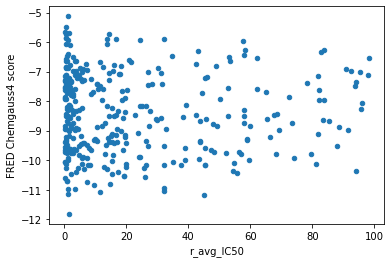

In [11]:
oedock1.sort_values(by=['r_avg_IC50'],ascending=True,inplace=True)
oedock1.plot(kind='scatter', x='r_avg_IC50', y='FRED Chemgauss4 score')

corr4 = oedock1.r_avg_IC50.corr(oedock1['FRED Chemgauss4 score'])
print(corr4)
print(oedock1)